<a href="https://colab.research.google.com/github/anniemoriondo/cs480student/blob/main/05/Moriondo_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

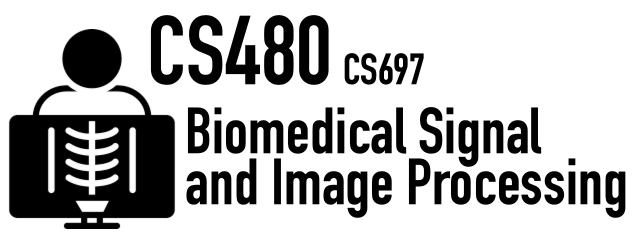
#Assignment 5

In [2]:
# In this assignment, we will visualize and explore a CT scan!

# I realize that we've discussed this in class, so it may not be worth full 
# credit at this point. Thank you for the flexibility on this. 

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: YOUR_ANSWER
# 220 images total

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

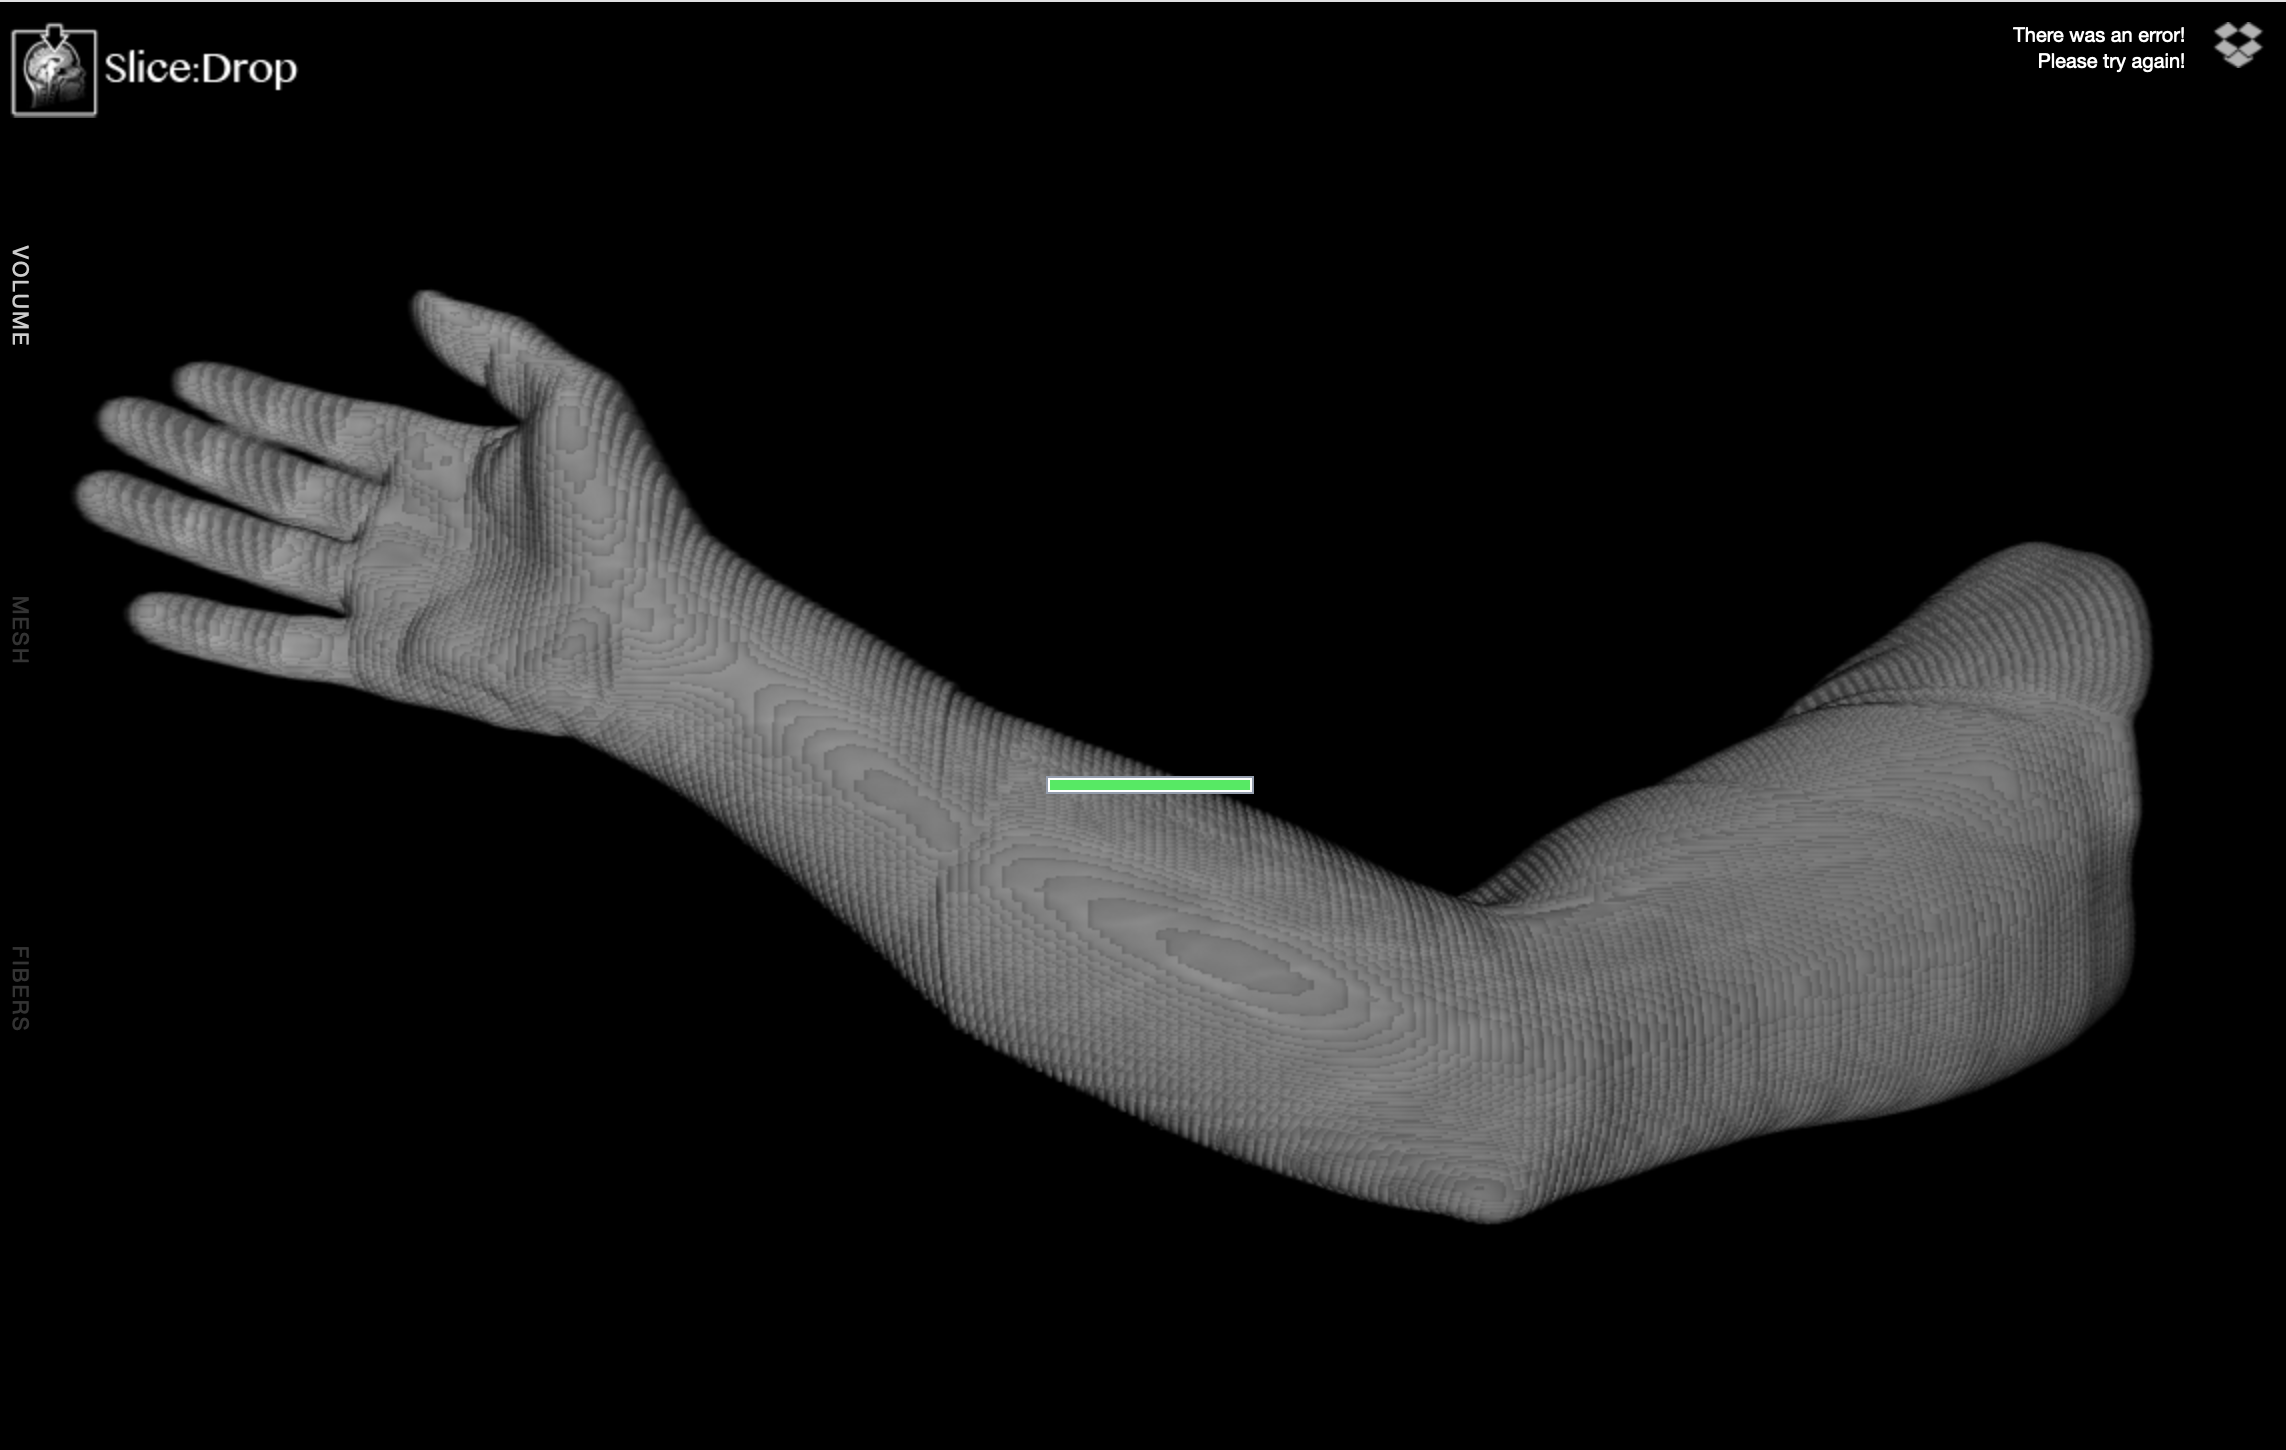

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [10]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [11]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [12]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [13]:
from pydicom import dcmread
import os

In [14]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
filenames = os.listdir("ct")
sorted_filenames = sorted(filenames)
#print(sorted_filenames)
dicom_files = []
for filename in sorted_filenames:
  path = "ct/" + filename
  dicom_files.append(dcmread(path))

# Get dimensions of a single image, and create shape tuple
total = len(dicom_files)
single_image = dicom_files[0].pixel_array
rows = len(single_image)
cols = len(single_image[0])
shape = (total, rows, cols)
print(shape)

# Generate array and populate it with images
dicom_images = numpy.zeros(shape)
for i in range(len(dicom_files)):
  dicom_images[i] = dicom_files[i].pixel_array

(220, 454, 512)


In [15]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

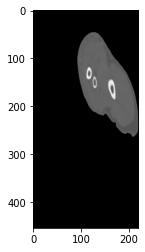

In [19]:
# TODO: YOUR CODE FOR AXIAL
axial_images = dicom_images.transpose((2,1,0))
for slice in axial_images:
  imshow(slice, cmap='gray')

# Get a slice from the middle - maybe this will show up better
imshow(axial_images[110], cmap='gray')

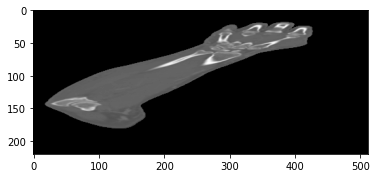

In [20]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_images = dicom_images.transpose((1,0,2))
for slice in sagittal_images:
  imshow(slice, cmap='gray')

# Another slice from the middle
imshow(sagittal_images[110], cmap='gray')

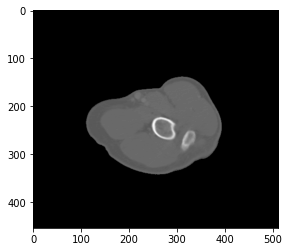

In [16]:
# TODO: YOUR CODE FOR CORONAL

# We can just iterate image by image, using the images as loaded.
for slice in dicom_images:
  imshow(slice, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

30 410 -1024


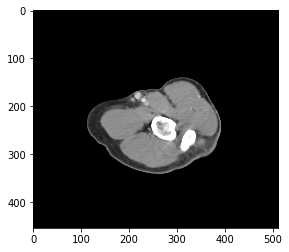

In [64]:
# TODO: YOUR CODE
slice0 = dicom_files[0]
window_ctr = slice0.WindowCenter
window_width = slice0.WindowWidth
rescale = slice0.RescaleIntercept
print(window_ctr, window_width, rescale)

# Get min and max
vmin = window_ctr - window_width/2
vmax = window_ctr + window_width/2

# View the last slice - it seemed clearly visible, so it's a good example
plt.imshow(dicom_images[219] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.


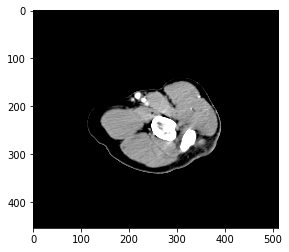

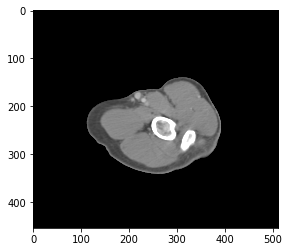

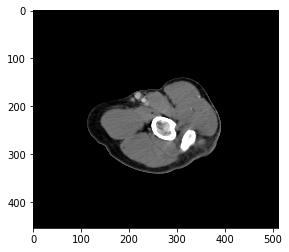

In [67]:
# TODO: YOUR CODE

# Try a narrower window
narrow_vmin = window_ctr - window_width/4
narrow_vmax = window_ctr + window_width/4
plt.imshow(dicom_images[219] + rescale, cmap='gray', 
           vmin=narrow_vmin, vmax=narrow_vmax)
plt.show()

# Try a wider window
wide_vmin = window_ctr - window_width * 0.75
wide_vmax = window_ctr + window_width * 0.75
plt.imshow(dicom_images[219] + rescale, cmap='gray', 
           vmin=wide_vmin, vmax=wide_vmax)
plt.show()

# Try a higher level
hi_vmin = window_ctr + 50 - window_width/2
hi_vmax = window_ctr + 50 + window_width/2
plt.imshow(dicom_images[219] + rescale, cmap='gray', 
           vmin=hi_vmin, vmax=hi_vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER
# The values as suggested in the hint make the most sense. Using the
# window width as specified in the data, centered at the window's center
# value, prevents having some pixels (fat?) be confused for background as 
# with the narrow window. It also prevents having low contrast like the wide
# window, which is not much of an improvement over the original data.  
# Raising the center somewhat had
# less of an effect, but still produced some indistinct regions.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""